In [217]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### open image

In [240]:
image=cv.imread("image.jpg")
cv.imshow("image", image)
cv.waitKey(0)
cv.destroyAllWindows()

In [147]:
def show(image,name):
    cv.imshow(name, image)
    cv.waitKey(0)
    cv.destroyAllWindows()

### resize

In [242]:
size=0.5
height, width = image.shape[:2]
dim=(int(width*size),int(height*size))
im = cv.resize(image, dim, interpolation = cv.INTER_AREA)
show(im,'resize')

### save image 

In [156]:
cv.imwrite("save_image.jpg",im)

True

### reflection and rotation

In [158]:
height, width = im.shape[:2]
M=cv.getRotationMatrix2D(center=((width)/2.0,(height)/2.0),angle=180,scale=1)
rot=cv.warpAffine(im,M,(width,height))
# rot=cv.rotate(im, cv.ROTATE_180)
cv.imshow("rotation",rot)
cv.waitKey(0)
cv.destroyAllWindows()
M = np.float32([[-1,0,width],
                [0,1, 0]])
ref=cv.warpAffine(im,M,(width,height))
show(ref,'ref')

### thresholding and gray

In [214]:
gray_im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
cv.imshow("gray", gray_im)
thresholded_im=cv.threshold(gray_im,200,255,0)[1]# black and white image
cv.imshow("black and white", thresholded_im)
cv.waitKey(0)
cv.destroyAllWindows()

### crop

In [241]:
print(im.shape)
crop=im[10:250,100:500]
show(crop,'crop')

(600, 800, 3)


### contours

In [215]:
# gray_im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
# cv.imshow("gray", gray_im)
# thresholded_im=cv.threshold(gray_im,200,255,0)[1]# black and white image
# cv.imshow("black and white", thresholded_im)
# cv.waitKey(0)
# cv.destroyAllWindows()

contours, hierarchy = cv.findContours(thresholded_im,cv.RETR_LIST ,cv.CHAIN_APPROX_SIMPLE)
im2=im.copy()
num=len(contours)-2
cv.drawContours( im2, contours, num,(255,255,0), 2 )
cv.imshow('contours', im2) 

cv.waitKey()
cv.destroyAllWindows()

cnt=contours[num]
moment=cv.moments(cnt)
print("Contour area=",moment['m00'])
print(cv.contourArea(cnt))



Contour area= 131945.5
131945.5


### split


In [216]:
[b, g, r] = cv.split(im)
im=cv.merge([b, g , r])
show(im,'image')

### histograms

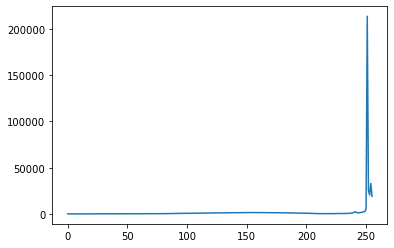

In [236]:
# show(gray_im,'gray')
hist = cv.calcHist ([gray_im], [0], None , [256], [0,256])

plt.plot(hist)#,256,[0,256]); 
plt.show()

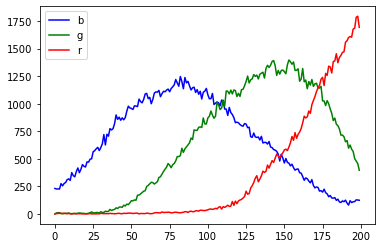

In [247]:
color = ('b','g','r')
#построенно в диопа
for i in range(len(color)):
    hist = cv.calcHist ([im], [i], None , [200], [0,200])
    plt.plot(hist[:],color = color[i])
plt.legend(color)
plt.show()